# Bayes Classifier

In [1]:
import pickle
import numpy as np
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

### Load data

In [2]:
#df = pd.read_csv("data/mixed_data.csv", sep=';')
df = pd.read_csv("../data/mixed_data_1200.csv", sep=';')
df = df.drop(["Unnamed: 0"],axis=1)
df.head(5)

,target,text
0,0,@Starrbby too bad I won't be around I lost my ...
1,0,amazon s3 plugin not worked in my website . it...
2,0,The Hoyts Distribution NZ website isn't workin...
3,0,dang won't be able to get to any workshops run...
4,0,Tried to install a Twitter-application on my p...


### Split data into train/test set

In [3]:
X_load = df["text"]
Y_load = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X_load,Y_load,test_size=0.2,random_state=42,shuffle=True)

### Vectorize Data

In [4]:
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
X_test_counts = count_vect.transform(X_test.values.astype('U'))
X_train_counts.shape

(2648, 5953)

### TF-IDF Data

In [5]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_train_tfidf.shape

(2648, 5953)

### Train model

In [6]:
bayesModel = MultinomialNB()
bayesModel.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predict
use the unlabled data

In [7]:
predictions = bayesModel.predict(X_test_tfidf)

### Evaluate

In [8]:
np.mean(predictions == y_test) #accuracy

0.8564954682779456

In [9]:
print(metrics.classification_report(y_test, predictions,target_names=["techno-stress","neutral","positive"]))
report = metrics.classification_report(y_test, predictions,target_names=["techno-stress","neutral","positive"],output_dict=True)
reportdf = pd.DataFrame(report).transpose()
#print(reportdf.to_latex())


               precision    recall  f1-score   support

techno-stress       0.79      0.99      0.88       259
      neutral       0.95      0.80      0.87       216
     positive       0.89      0.74      0.81       187

    micro avg       0.86      0.86      0.86       662
    macro avg       0.88      0.84      0.85       662
 weighted avg       0.87      0.86      0.85       662



#### Learning Curve

/Users/ChrisChross/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


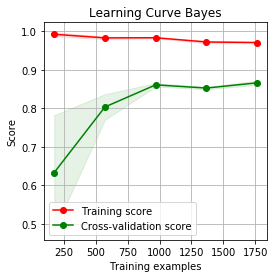

In [10]:
learn1 = skplt.estimators.plot_learning_curve(bayesModel, X_train_tfidf, y_train,figsize=(4,4))
plt.title("Learning Curve Bayes")
plt.show()

#### Confusion Matrix

<Figure size 432x288 with 0 Axes>

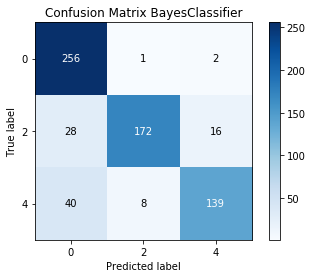

In [11]:
plt.figure()
skplt.metrics.plot_confusion_matrix(y_test,predictions,normalize=False)
plt.title("Confusion Matrix BayesClassifier")
plt.show()